# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename) # YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. **We are using the World Happiness Report (WHR) dataset. It contains country-year records from 2005-2017 with metrics like life satisfaction, GDP, social support, and government trust scores across 156 countries.**


2. **Prediction Target: The first model predicts Confidence in National Government - a numerical score where higher values mean that citizens trust their government more; this measures public perception of leadership credibility in each country/year. The second model predicts Perceptions of Corruption - a numerical score where lower values indicate that citizens have higher levels of life satisfaction; this measures public perception of corruption in a country's government and business sector, which is closely linked to the confidence in/quality of the government.**


3. **Problem Type: Supervised learning: we have historical data with known outcomes, Regression problem: predicting a continuous number instead of categories, not classification because our output is a score (e.g. 0.61) and would not be a categorical/class label**


4. **Key Features (starting point): Social support: People with strong social networks might trust institutions more, Healthy life expectancy: Better public health systems could boost government trust, Freedom to make life choices: More liberty to higher confidence in leadership, Perceptions of corruption: Directly impacts trust (more corruption = lower confidence), we will test other features like GDP, life satisfaction, and mood scores later on as we go.**


5. **Predicting government trust and perceptions of corruption helps identify brewing social crises before elections or protests. News agencies could flag at-risk countries, NGOs could target interventions where confidence is dropping, and governments themselves could monitor policy impacts in real-time. If corruption perceptions suddenly spike while trust scores plummet, it could signal political instability needing urgent action.**

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Dataset Shape: (1562, 19)

Column Names: ['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']

Data Types:
 country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                    

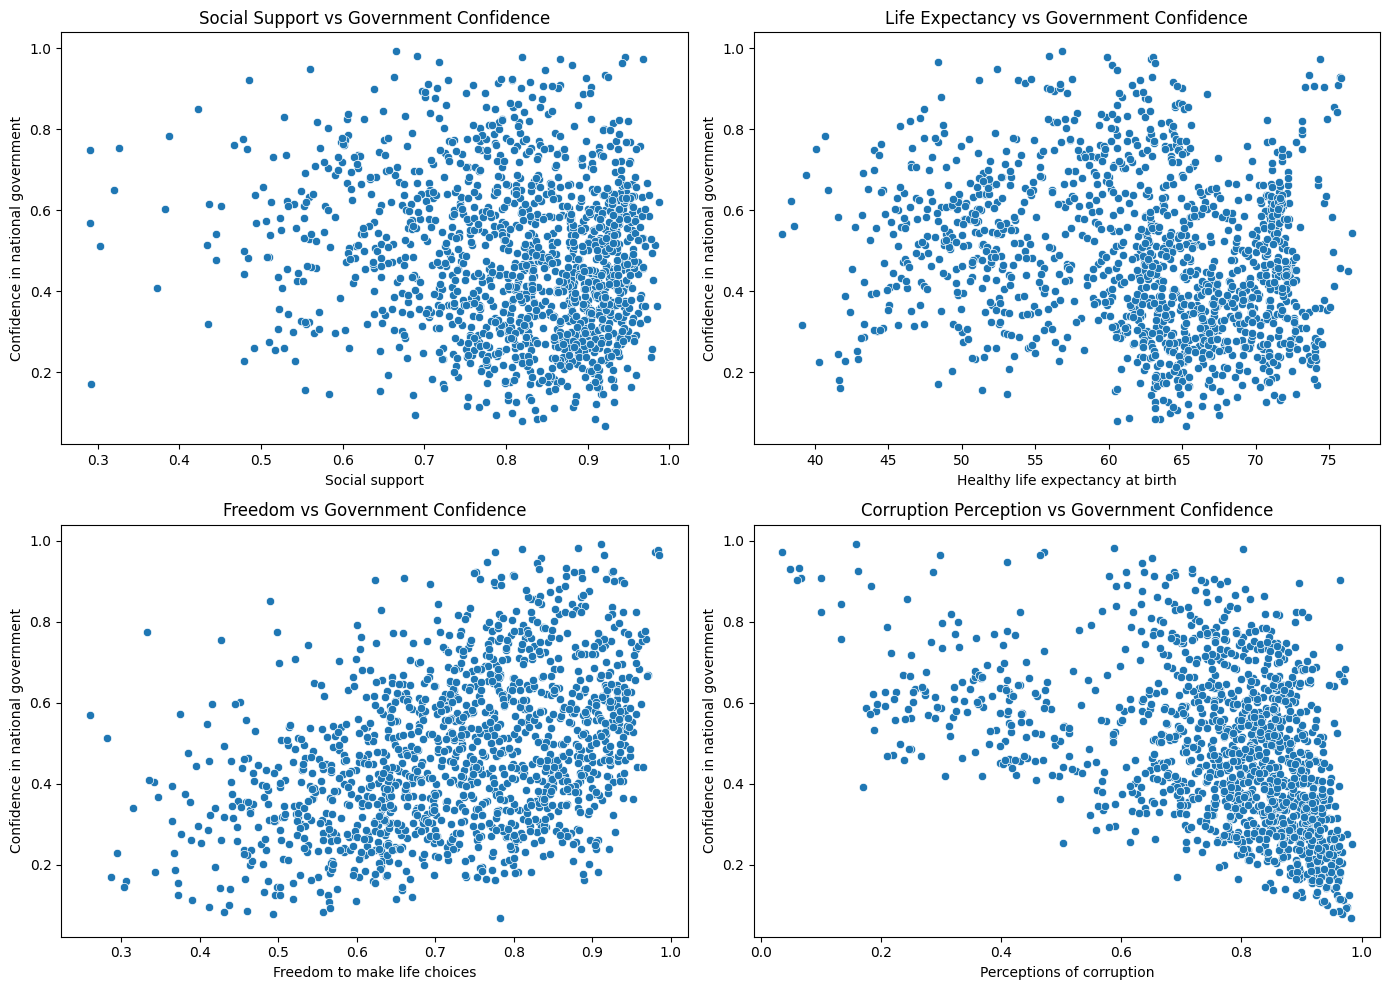

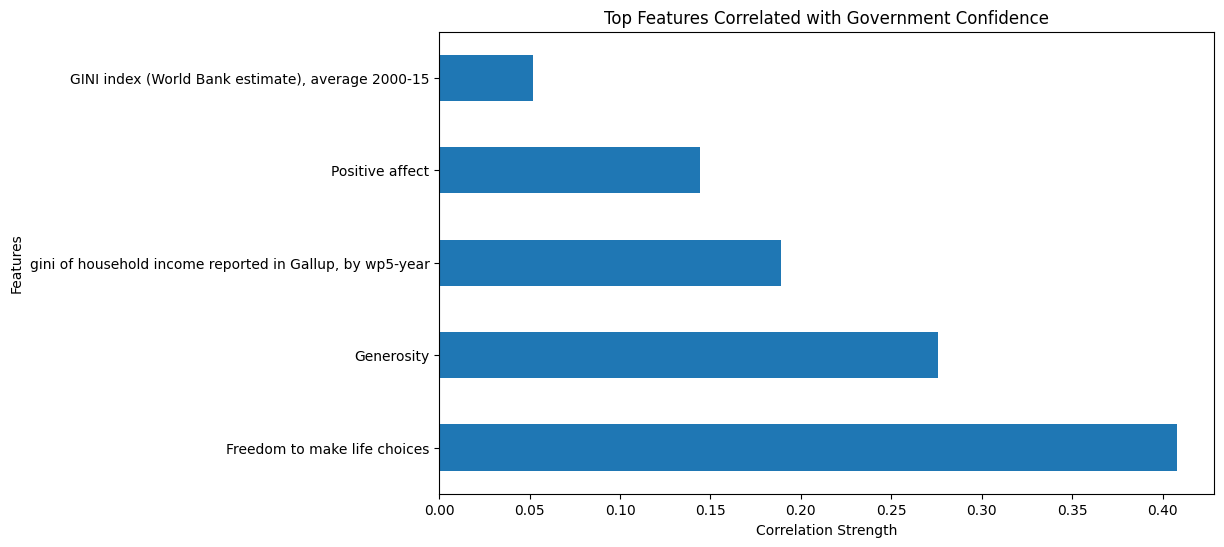

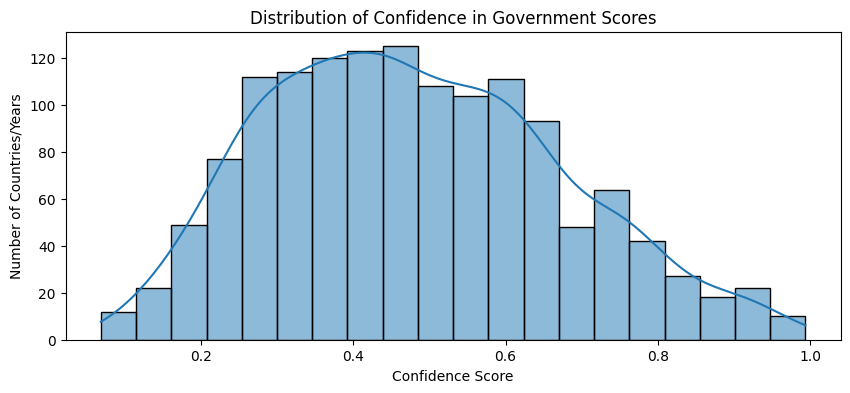

In [3]:

# Initial Data Inspection
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())
print("\nFirst 10 Rows:\n", df.head(10))

# Missing Value Analysis
print("\nMissing Values per Column:")
print(np.sum(df.isnull(), axis=0))
print("\nAny Missing Values?:", df.isnull().values.any())

# Correlation Analysis
print("\nCorrelation Matrix:\n", round(df.corr(), 5))

# Key Relationships Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Social support
sns.scatterplot(data=df, x='Social support', y='Confidence in national government', ax=axes[0,0])
axes[0,0].set_title('Social Support vs Government Confidence')

# Healthy Life Expectancy
sns.scatterplot(data=df, x='Healthy life expectancy at birth', y='Confidence in national government', ax=axes[0,1])
axes[0,1].set_title('Life Expectancy vs Government Confidence')

# Freedom of choice
sns.scatterplot(data=df, x='Freedom to make life choices', y='Confidence in national government', ax=axes[1,0])
axes[1,0].set_title('Freedom vs Government Confidence')

# Corruption perception
sns.scatterplot(data=df, x='Perceptions of corruption', y='Confidence in national government', ax=axes[1,1])
axes[1,1].set_title('Corruption Perception vs Government Confidence')

plt.tight_layout()
plt.show()

# Top Correlated Features
plt.figure(figsize=(10, 6))
df.corr()['Confidence in national government'] \
    .sort_values(ascending=False)[1:6] \
    .plot(kind='barh')
plt.title('Top Features Correlated with Government Confidence')
plt.xlabel('Correlation Strength')
plt.ylabel('Features')
plt.show()

# Target Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Confidence in national government'], kde=True, bins=20)
plt.title('Distribution of Confidence in Government Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Countries/Years')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 


**1. Feature Selection**  
After digging through the data, we'll focus on these 6 key features that actually connect to government trust/perceptions of corruption: Social support, Healthy life expectancy, Freedom of choice, Democratic Quality, Life Ladder (overall happiness), and a new combo feature we'll create for the first model called "Trust Factor" (which mixes freedom and corruption scores). We are dropping country names and years because they don't help predict trust levels, and cutting loose the GINI inequality stats and Generosity scores because they're either missing too much data or just don't connect to our target.

**2. Data Cleaning Steps**  
For the first model, we'll fix missing numbers by plugging in typical values (using each column's median). Then handle extreme values by capping anything way outside normal ranges, like if a country's corruption score is ten times higher than others. We are creating a new "Trust Factor" feature that combines freedom and corruption since they interact in interesting ways. Finally, we'll scale all numbers to the same 0-1 range so no single feature dominates just because its numbers are bigger. For the second model, we will handle missing values by imputing the mean, apply Winsorization to reduce the influence of outliers, and then scale the features to keep data consistent.

**3. Model Choices**  
We're starting simple with Linear Regression as a basic linear baseline model. We would like to compare multiple different approaches such as Random Forest (which handles complex patterns better like how different factors interact), Decision Trees (simple for non-linear patterns), Ridge Regression (regularization term), Gradient Boosted Decision Trees (sequential, corrects errors), and Stacking (combines models).

**4. Training Strategy and Performance**  
For the first model (predicts Confidence in Government), we'll split the data three ways: 70% for training, 15% for tuning models during development, and 15% saved for final testing. We'll train all models on the main chunk, then check their performance on the tuning set using two key scores: MAE (average prediction error) and R-squared (how much of the pattern they capture). The winner gets optimized - adjusting settings like tree depth for Random Forest. Only when satisfied will we run the final test on that untouched 15% to confirm real-world performance. Comparing training vs. test performance will allow us to check if it is underfitting, overfitting, or has good generalization.

The second model (predicting Perceptions of Corruption) will have a similar approach but will compute and compare three evaluation metrics: MAE, R-squared, and RMSE (Root Mean Square Error, which penalizes large errors). We can then compare the results of how each model type (e.g. GBDT, LR, Stacking) performs for each metric. 

We will also analyze performance by visualization, for instance, a scatter plot of predicted vs. actual values, a histogram for error analysis and prediction error distribution, a bar graph for model performance comparison, or a heatmap for final feature correlation.

**5. Safety Nets**  
1) Use 5-fold cross-validation (testing different data combinations), 2) Always compare against a simple "guess the average" baseline, and 3) Track both error size (MAE) and pattern capture (R²) at every stage. If the first model winner struggles, we'll loop back, tweaking features, fixing more data quirks, or testing other models until we get solid, reliable predictions about what makes people trust their governments.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

MODEL 1: Confidence in National Government Prediction
Removed 161 rows with missing target values

Data shapes for Model 1:
Train: (980, 6), Validation: (210, 6), Test: (211, 6)


Linear Regression Validation Scores: MAE: 0.1109  R²: 0.4529


Ridge Regression Validation Scores: MAE: 0.1110  R²: 0.4539


Random Forest Validation Scores: MAE: 0.0957  R²: 0.5831


Gradient Boosting Validation Scores: MAE: 0.0981  R²: 0.5785

Best Model for 'Confidence in Government' Prediction: Random Forest

FINAL TEST SCORES FOR GOVERNMENT CONFIDENCE MODEL
MAE: 0.0944  R²: 0.5666

Feature Importances:


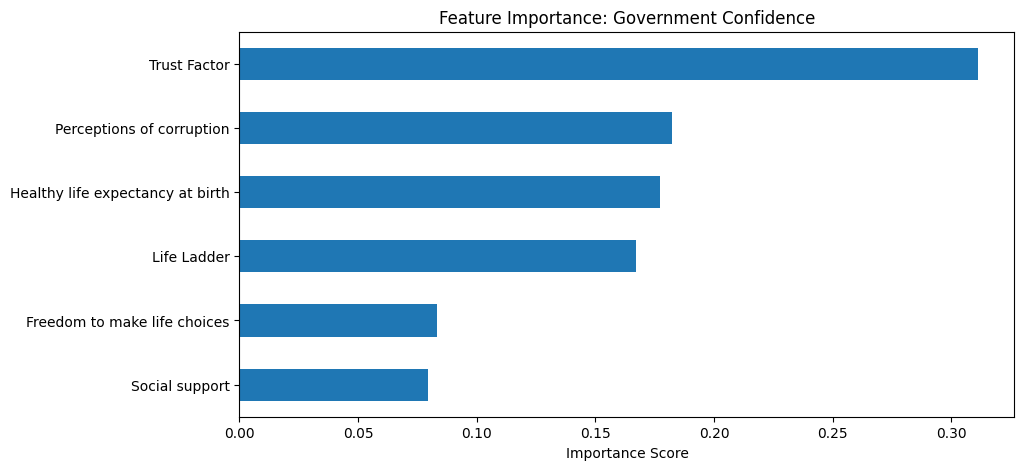

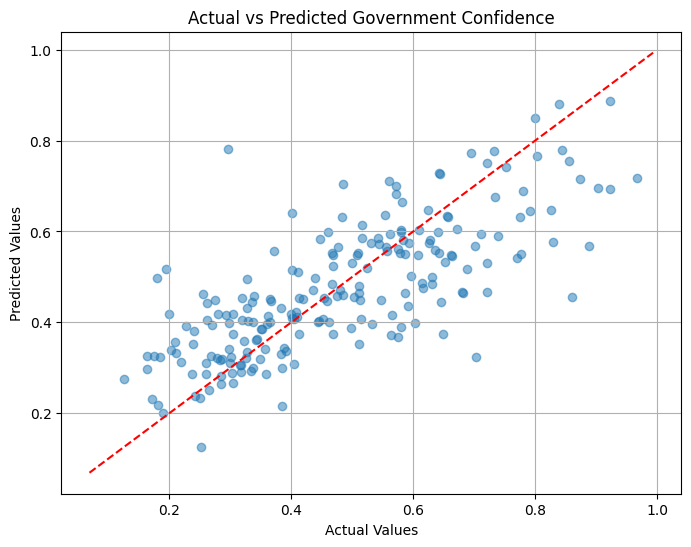


Error Analysis:
Average Error: 0.0043
Max Underestimation: -0.4853
Max Overestimation: 0.4054


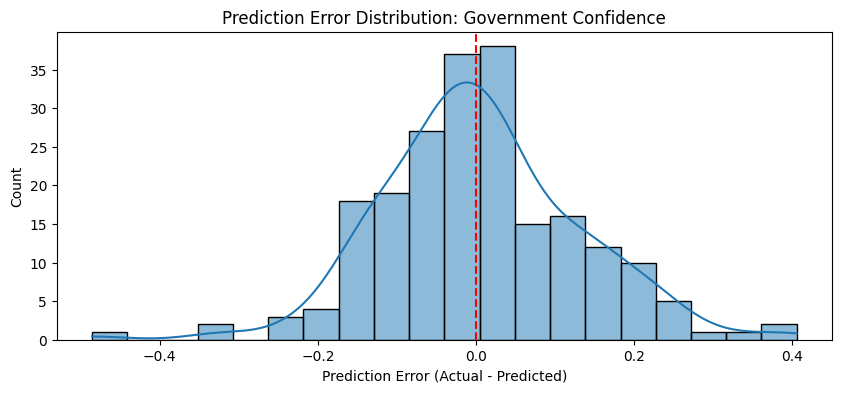

MODEL 2: Perceptions of Corruption Prediction

Model Performance Comparison:
LR: RMSE = 0.1501, R² = 0.3239, MAE = 0.1143
DT: RMSE = 0.1333, R² = 0.4668, MAE = 0.0947
Stacking: RMSE = 0.1328, R² = 0.4707, MAE = 0.0973
GBDT: RMSE = 0.1129, R² = 0.6179, MAE = 0.0803
RF: RMSE = 0.1130, R² = 0.6168, MAE = 0.0828

Best RMSE: GBDT
Best R²: GBDT
Best MAE: GBDT
Best Model for 'Corruption Perception' Prediction: GBDT


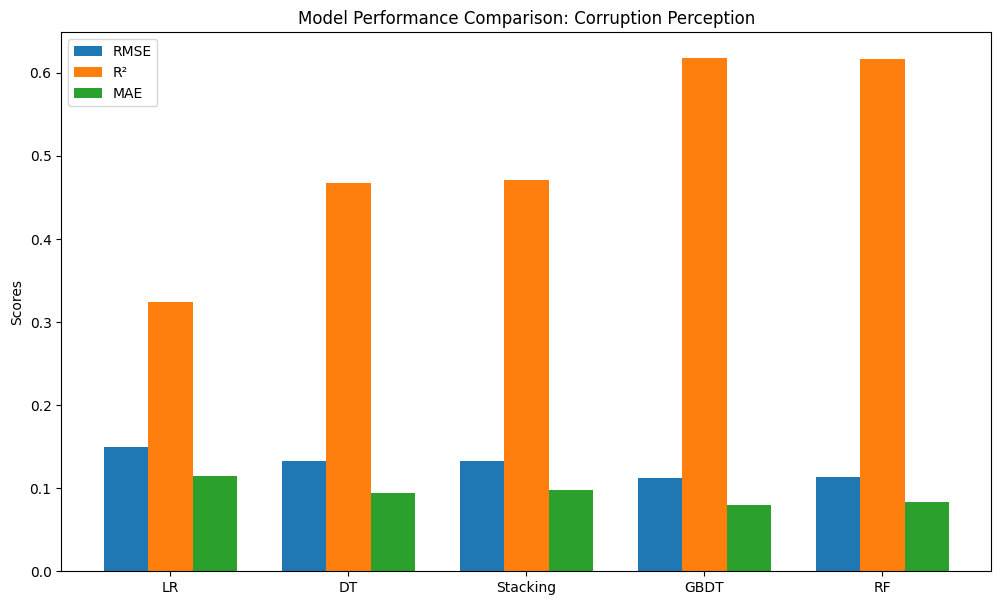

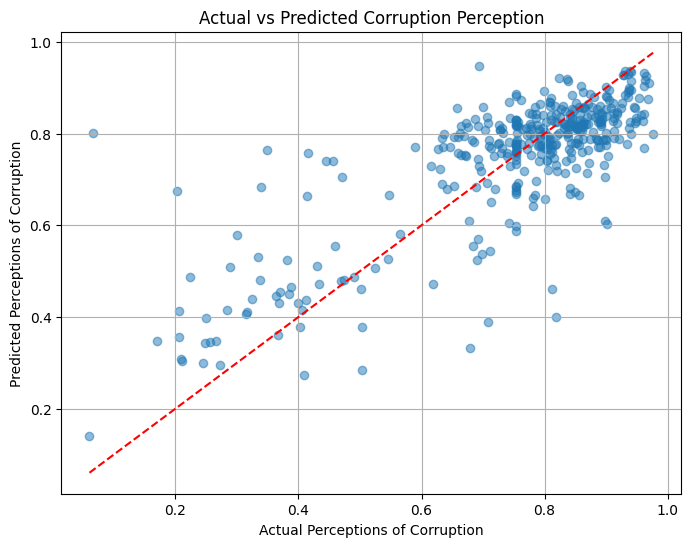

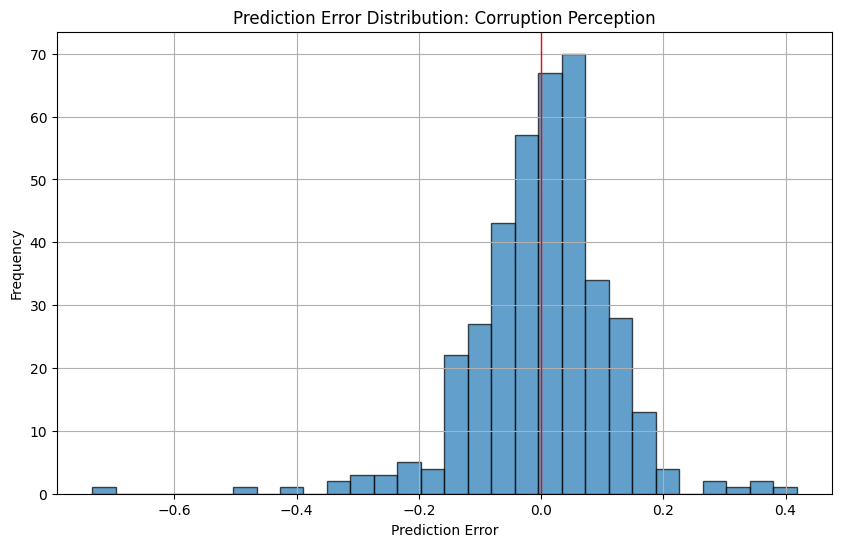

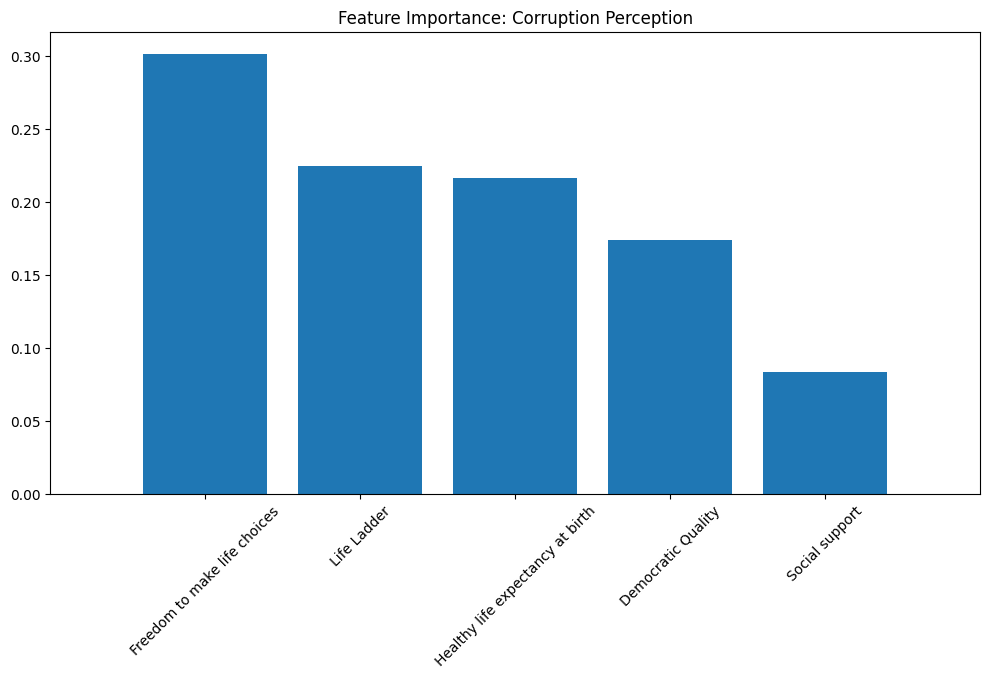

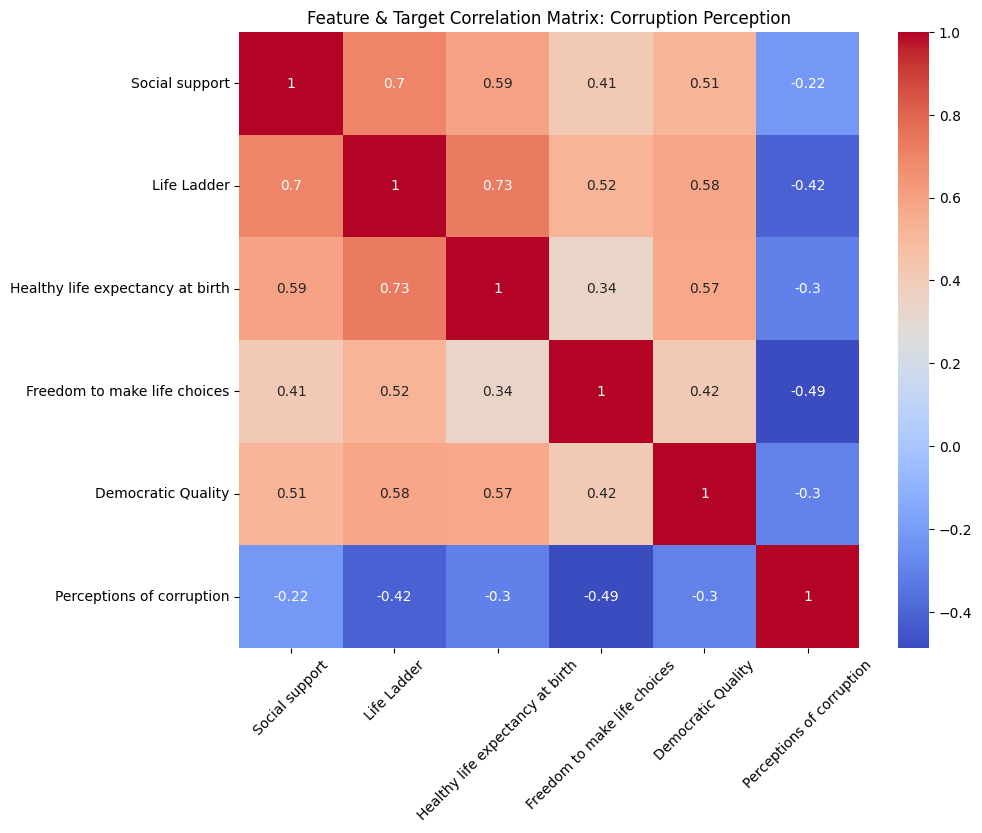

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# MODEL 1: Confidence in National Government Prediction

print("MODEL 1: Confidence in National Government Prediction")


# Feature engineering
df['Trust Factor'] = df['Freedom to make life choices'] / (df['Perceptions of corruption'] + 0.01)

# Define features and target
features1 = [
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Life Ladder',
    'Trust Factor']

target1 = 'Confidence in national government'

# Prepare data
df_clean1 = df.dropna(subset=[target1])
print(f"Removed {len(df) - len(df_clean1)} rows with missing target values")

X1 = df_clean1[features1]
y1 = df_clean1[target1]

# Handle missing values
imputer = SimpleImputer(strategy='median')
X1_imputed = imputer.fit_transform(X1)

# Scale features
scaler1 = MinMaxScaler()
X1_scaled = scaler1.fit_transform(X1_imputed)

# Split data
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1_scaled, y1, test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=42)

print("\nData shapes for Model 1:")
print(f"Train: {X1_train.shape}, Validation: {X1_val.shape}, Test: {X1_test.shape}")

# Model training
models1 = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)}


# Train and validate models
results1 = {}
for name, model in models1.items():
    print(f"\n")
    model.fit(X1_train, y1_train)
    val_preds = model.predict(X1_val)
    mae = mean_absolute_error(y1_val, val_preds)
    r2 = r2_score(y1_val, val_preds)
    results1[name] = {"MAE": mae, "R2": r2}
    print(f"{name} Validation Scores: MAE: {mae:.4f}  R²: {r2:.4f}")

# Select best model
best_model_name = min(results1, key=lambda x: results1[x]['MAE'])
best_model = models1[best_model_name]
print(f"\nBest Model for 'Confidence in Government' Prediction: {best_model_name}")

# Final training and evaluation
X1_train_val = np.vstack((X1_train, X1_val))
y1_train_val = np.concatenate((y1_train, y1_val))
best_model.fit(X1_train_val, y1_train_val)

test_preds1 = best_model.predict(X1_test)
final_mae = mean_absolute_error(y1_test, test_preds1)
final_r2 = r2_score(y1_test, test_preds1)

print("\nFINAL TEST SCORES FOR GOVERNMENT CONFIDENCE MODEL")
print(f"MAE: {final_mae:.4f}  R²: {final_r2:.4f}")

# Model analysis
if hasattr(best_model, 'feature_importances_'):
    print("\nFeature Importances:")
    importance = pd.Series(best_model.feature_importances_, index=features1)
    plt.figure(figsize=(10, 5))
    importance.sort_values().plot(kind='barh')
    plt.title('Feature Importance: Government Confidence')
    plt.xlabel('Importance Score')
    plt.show()
elif hasattr(best_model, 'coef_'):
    print("\nFeature Coefficients:")
    coef = pd.Series(best_model.coef_, index=features1)
    plt.figure(figsize=(10, 5))
    coef.sort_values().plot(kind='barh')
    plt.title('Feature Impact: Government Confidence')
    plt.xlabel('Coefficient Value')
    plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, test_preds1, alpha=0.5)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--')
plt.title('Actual vs Predicted Government Confidence')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Error analysis
errors1 = y1_test - test_preds1
print("\nError Analysis:")
print(f"Average Error: {errors1.mean():.4f}")
print(f"Max Underestimation: {errors1.min():.4f}")
print(f"Max Overestimation: {errors1.max():.4f}")

plt.figure(figsize=(10, 4))
sns.histplot(errors1, kde=True, bins=20)
plt.title('Prediction Error Distribution: Government Confidence')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.axvline(0, color='r', linestyle='--')
plt.show()

# MODEL 2: Perceptions of Corruption Prediction
print("MODEL 2: Perceptions of Corruption Prediction")

# Define features and target
features2 = [
    'Social support', 
    'Life Ladder', 
    'Healthy life expectancy at birth',
    'Freedom to make life choices', 
    'Democratic Quality']

target2 = 'Perceptions of corruption'

X2 = df[features2].copy()
y2 = df[target2].copy()

# Handle missing values
for col in features2:
    # Compute mean once and fill
    col_mean = X2[col].mean()
    X2[col] = X2[col].fillna(col_mean)
    
# Handle target missing values
y2 = y2.fillna(y2.mean())

# Winsorization
for col in features2:
    # Convert to numpy array for winsorization
    winsorized = winsorize(X2[col].values, limits=[0.01, 0.01])
    X2[col] = winsorized

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

# Scale features
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Define RMSE calculation without warnings
def safe_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize models
model_list = {}
metrics = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X2_train_scaled, y2_train)
y_pred_lr = lr.predict(X2_test_scaled)
lr_rmse = safe_rmse(y2_test, y_pred_lr)  # Fixed RMSE calculation
lr_r2 = r2_score(y2_test, y_pred_lr)
lr_mae = mean_absolute_error(y2_test, y_pred_lr)
model_list['LR'] = lr
metrics['LR'] = {'RMSE': lr_rmse, 'R2': lr_r2, 'MAE': lr_mae}

# Decision Tree with GridSearch
param_grid_dt = {'max_depth': [4, 5], 'min_samples_leaf': [25, 50]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=3, scoring='neg_root_mean_squared_error')
dt_grid.fit(X2_train_scaled, y2_train)
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X2_test_scaled)
dt_rmse = safe_rmse(y2_test, y_pred_dt)  
dt_r2 = r2_score(y2_test, y_pred_dt)
dt_mae = mean_absolute_error(y2_test, y_pred_dt)
model_list['DT'] = dt_best
metrics['DT'] = {'RMSE': dt_rmse, 'R2': dt_r2, 'MAE': dt_mae}

# Stacking Model
stack = StackingRegressor(estimators=[("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)), ("LR", LinearRegression())], passthrough=True)
stack.fit(X2_train_scaled, y2_train)
y_pred_stack = stack.predict(X2_test_scaled)
stack_rmse = safe_rmse(y2_test, y_pred_stack)  
stack_r2 = r2_score(y2_test, y_pred_stack)
stack_mae = mean_absolute_error(y2_test, y_pred_stack)
model_list['Stacking'] = stack
metrics['Stacking'] = {'RMSE': stack_rmse, 'R2': stack_r2, 'MAE': stack_mae}

# Gradient Boosting with GridSearch
param_grid_gb = {'n_estimators': [100, 200], 'max_depth': [4, 5], 'learning_rate': [0.01, 0.05]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=3, scoring='neg_root_mean_squared_error')
gb_grid.fit(X2_train_scaled, y2_train)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(X2_test_scaled)
gb_rmse = safe_rmse(y2_test, y_pred_gb)  # Fixed RMSE calculation
gb_r2 = r2_score(y2_test, y_pred_gb)
gb_mae = mean_absolute_error(y2_test, y_pred_gb)
model_list['GBDT'] = gb_best
metrics['GBDT'] = {'RMSE': gb_rmse, 'R2': gb_r2, 'MAE': gb_mae}

# Random Forest with GridSearch
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [4, 5], 'min_samples_leaf': [5, 10]}
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=3, scoring='neg_root_mean_squared_error')
rf_grid.fit(X2_train_scaled, y2_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X2_test_scaled)
rf_rmse = safe_rmse(y2_test, y_pred_rf)  # Fixed RMSE calculation
rf_r2 = r2_score(y2_test, y_pred_rf)
rf_mae = mean_absolute_error(y2_test, y_pred_rf)
model_list['RF'] = rf_best
metrics['RF'] = {'RMSE': rf_rmse, 'R2': rf_r2, 'MAE': rf_mae}

# Print metrics
print("\nModel Performance Comparison:")
for name, scores in metrics.items():
    print(f"{name}: RMSE = {scores['RMSE']:.4f}, R² = {scores['R2']:.4f}, MAE = {scores['MAE']:.4f}")

# Find best models
best_rmse_model = min(metrics, key=lambda x: metrics[x]['RMSE'])
best_r2_model = max(metrics, key=lambda x: metrics[x]['R2'])
best_mae_model = min(metrics, key=lambda x: metrics[x]['MAE'])
print(f"\nBest RMSE: {best_rmse_model}")
print(f"Best R²: {best_r2_model}")
print(f"Best MAE: {best_mae_model}")

# Best model analysis
best_models = [best_rmse_model, best_r2_model, best_mae_model]
model_count = {}
for model in best_models:
    if model in model_count:
        model_count[model] += 1
    else:
        model_count[model] = 1
most_count = max(model_count, key=model_count.get)
max_count = model_count[most_count]
best_model = model_list[most_count]
print(f"Best Model for 'Corruption Perception' Prediction: {most_count}")

test_preds2 = best_model.predict(X2_test_scaled)


# Visualization
rmse_vals = [metrics[name]['RMSE'] for name in metrics]
r2_vals = [metrics[name]['R2'] for name in metrics]
mae_vals = [metrics[name]['MAE'] for name in metrics]
labels = list(metrics.keys())

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width, rmse_vals, width, label='RMSE')
ax.bar(x, r2_vals, width, label='R²')
ax.bar(x + width, mae_vals, width, label='MAE')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: Corruption Perception')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


# Actual vs predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, test_preds2, alpha=0.5)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.title(f'Actual vs Predicted Corruption Perception')
plt.xlabel('Actual Perceptions of Corruption')
plt.ylabel('Predicted Perceptions of Corruption')
plt.grid(True)
plt.show()

# Error analysis
errors = y2_test - test_preds2
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Prediction Error Distribution: Corruption Perception')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linewidth=1)
plt.grid(True)
plt.show()

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importance: Corruption Perception")
    plt.bar(range(X2_train_scaled.shape[1]), importances[indices], align="center")
    plt.xticks(range(X2_train_scaled.shape[1]), X2.columns[indices], rotation=45)
    plt.xlim([-1, X2_train_scaled.shape[1]])
elif hasattr(best_model, 'coef_'):
    coef = best_model.coef_
    plt.figure(figsize=(12, 6))
    plt.title("Feature Coefficients")
    plt.bar(range(X2_train_scaled.shape[1]), coef, align="center")
    plt.xticks(range(X2_train_scaled.shape[1]), X2.columns, rotation=45)
    plt.xlim([-1, X2_train_scaled.shape[1]])

# Correlation matrix including target
corr_df = pd.concat([X2, y2.rename(target2)], axis=1)
corr_matrix = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature & Target Correlation Matrix: Corruption Perception')
plt.xticks(rotation=45)
plt.show()
